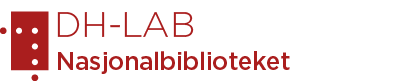

# 1. N-gramdata

Data kan hentes ut fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) ved hjelp av klassen `Ngram`.

`Ngram` tar følgende parametre:

`Ngram(
    words=[
        "han", 
        "hun"
        ],
    from_year=1950,
    to_year=1990,
    doctype="bok"
    )` 

Ngram-obektetet inneholder en dataramme som kan analyseres, og metoder for visualisering og analyse.

Vi støtter N-gram basert på bøker eller aviser. Man kan velge hvilket korpus man vil bruke med å sette paramenteret `doctype` til `"bok"` eller `"avis"`. Hvis ingen blir spesifisert brukes bokkorpuset.

In [46]:
import dhlab as dh
from dhlab import Ngram, NgramBook, NgramNews
from dhlab.ngram.nb_ngram import nb_ngram
from dhlab.api.nb_ngram_api import make_word_graph
from dhlab import graph_networkx_louvain as gnl

* Ngram
* NgramBook
* NgramNews
* nb_ngram
* make_word_graph
  * clustre

## 1.1 Plotting

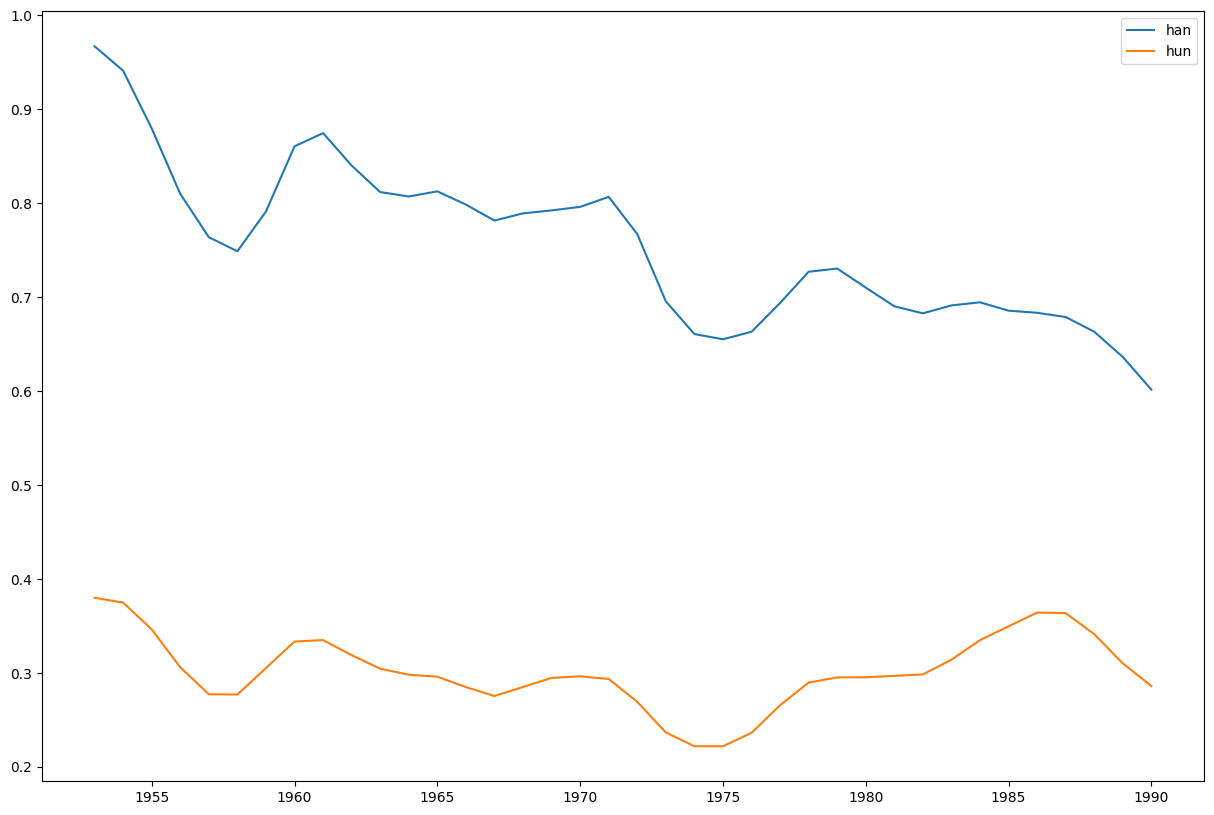

In [116]:
# Ngram på 'han' og 'hun' på bøker utgitt 1950-1990
Ngram(
    words=[
        "han", 
        "hun"
        ],
    from_year=1950,
    to_year=1990,
    doctype="bok"
    )

Visualisering kan konfigurerers med `Ngram.plot()`
* `Ngram.plot` har paramenteret `smooth` i tillegg til paramenterene til `pandas.DataFrame.plot()`.

* `smooth` er et parameter for glatting. Forekomsten av et ord er til en viss grad styrt av tilfeldigheter, for eks. hvilke bøker som ble utgitt ett bestemt år: For å rette noe på denne skjevheten, «glattes» resultatene ut før de vises. Glatting vil si at relativfrekvensen for ett år beregnes som et gjennomsnitt av frekvensen i dette og et visst antall forutgående og etterfølgende år: En glatting på fire innebærer at resultatene for fire år før og fire år etter legges sammen med dem for det aktuelle året, delt på ni (antall år totalt). Dette gjør kurvene jevnere enn i rådataene hvor det er langt mer spisse topper.

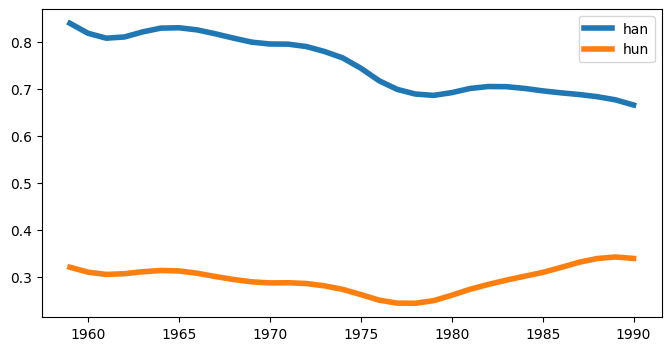

In [119]:
# Ngram på 'han' og 'hun' på bøker utgitt 1950-1990
# Glatting, plot-type, størrelse og strektykkelse
Ngram(
    words=[
        "han", 
        "hun"
        ],
    from_year=1950,
    to_year=1990,
    doctype="bok"
    ).plot(smooth=10, kind="line", figsize=(8, 4), lw=4)

### Dataramme

In [121]:
# Adgang til N-grammet som dataramme gjennom Ngram.frame
Ngram(
    words=[
        "han", 
        "hun"
        ],
    from_year=1950,
    to_year=1990,
    doctype="bok"
    ).frame.head()

,han,hun
1950,0.961575,0.376442
1951,0.990294,0.370878
1952,0.946277,0.390889
1953,0.965377,0.377961
1954,0.803514,0.321345


### Avis N-gram
Lag N-gram basert på avis ved å sette `doctype` til `"avis"`.


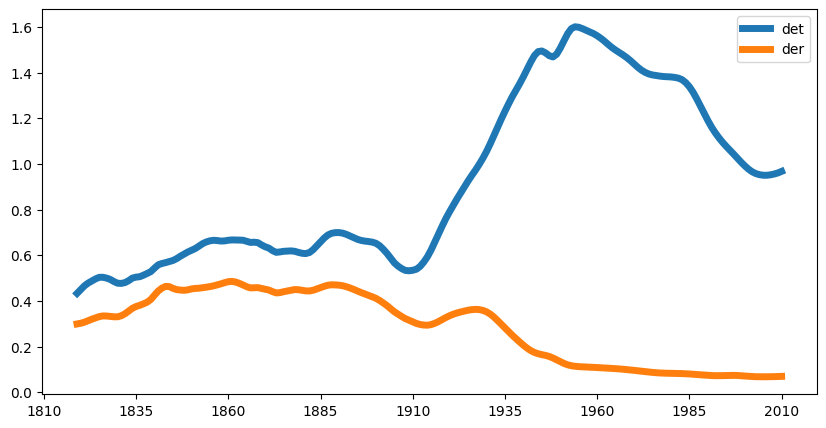

In [127]:
Ngram(
    ["det", "der"],
    doctype="avis",
    from_year=1810,
    to_year=2010
).plot(smooth=10, figsize=(10, 5), lw=5)

## N-gram med jokertegn

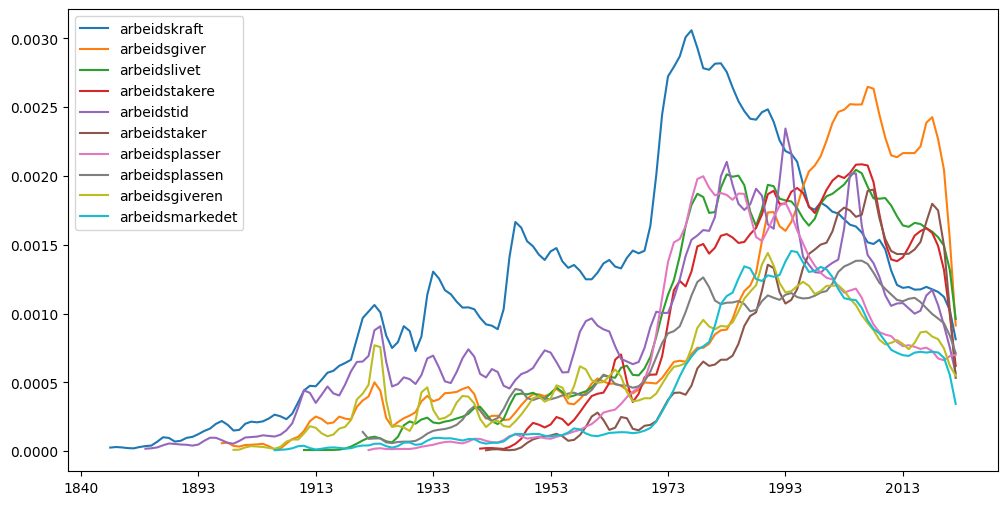

In [130]:
Ngram(
    ["arbeids*"],
    from_year=1810
).plot(figsize=(12, 6))

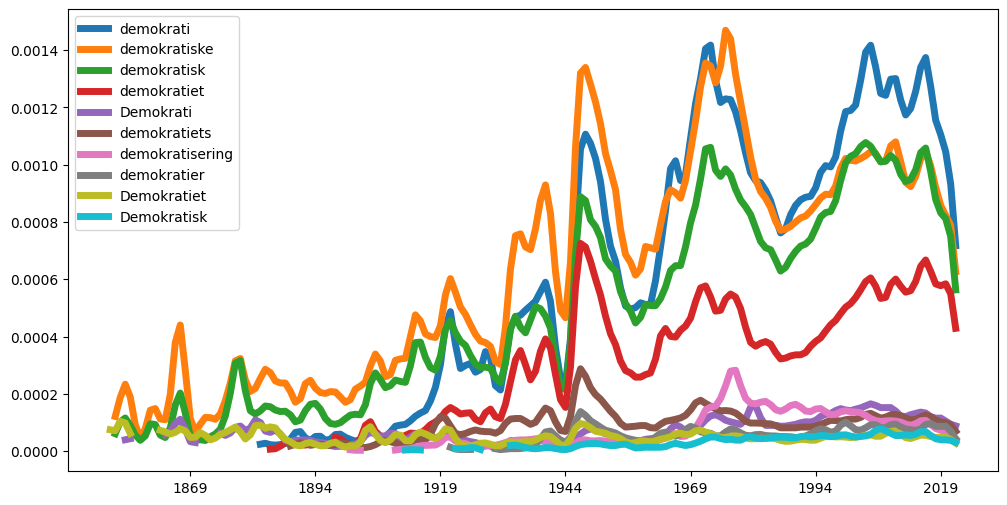

In [128]:
Ngram(
    ["demokrati*"],
    from_year=1800
    ).plot(smooth=4, figsize=(12,6), lw=5)

## Galakser

Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.


In [134]:
is_graf = make_word_graph("is", corpus='all', cutoff=16, leaves=0)

Grafer tegnes og analyseres med pakken [networkx](https://networkx.github.io/). Kommandoer er bygd over den pakken, og kommando for å vise grafen er `show_graph` fra modulen `graph_networkx_louvain`.

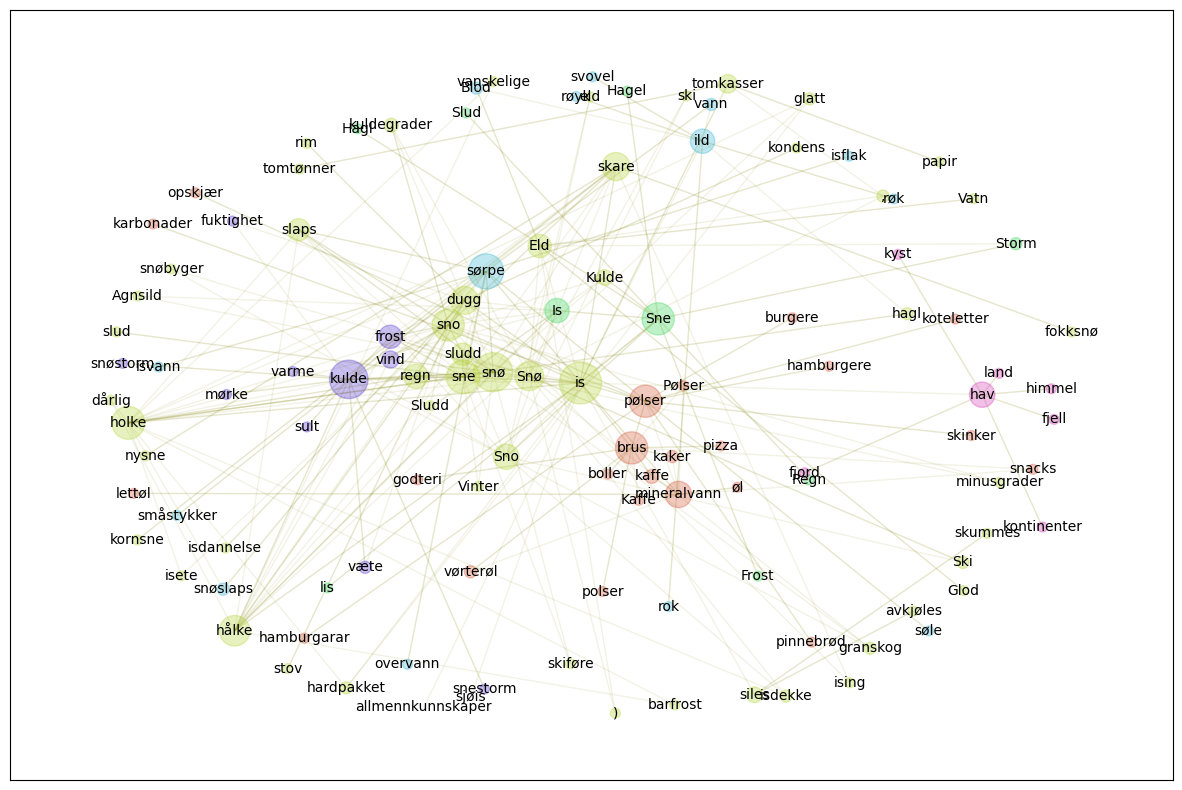

In [139]:
gnl.show_graph(is_graf, spread=5)

Bruk kommando `show_communities` fra `gnl` for å se på clustre.

In [140]:
gnl.show_community(is_graf)

1 skummes, is, vanskelige, eld, Snø, holke, tomkasser, sne, snø, Agnsild, Kulde, Vinter, snøbyger, dårlig, barfrost, glatt, kondens, ), siles, kornsne, Vatn, minusgrader, isdekke, stov, isete, slaps, ski, hagl, tomtønner, dugg, hardpakket, Eld, skare, sludd, sno, Glod, kuldegrader, allmennkunnskaper, slud, nysne, sjøis, skiføre, fokksnø, isdannelse, rim, papir, Sludd, granskog, regn, hålke, avkjøles, ising, Ski, ,, Sno

2 Hagel, Regn, Is, Frost, lis, Hagl, Storm, Sne, Slud

3 ild, sørpe, overvann, svovel, rok, isvann, vann, røk, søle, småstykker, snøslaps, isflak, Blod, røyk

4 væte, varme, snestorm, snøstorm, frost, kulde, sult, mørke, vind, fuktighet

5 kyst, land, himmel, hav, fjell, kontinenter, fjord

6 pinnebrød, boller, brus, hamburgarar, hamburgere, karbonader, pølser, godteri, snacks, koteletter, Pølser, burgere, mineralvann, vørterøl, kaker, skinker, øl, polser, Kaffe, opskjær, kaffe, pizza, lettøl



True